# Introduction:



#### Problem Description:

Hate speech and abusive language detection are crucial tasks in natural language processing (NLP) with a significant impact on society. However, the accuracy of hate speech and abusive language detection models heavily depends on the quality of the datasets they are trained on. It has been observed that many publicly available datasets for hate speech and abusive language detection are biased towards certain racial groups. This can result in models that are more likely to misclassify hate speech or abusive language directed towards certain racial groups, while performing better on other groups.

This problem is particularly concerning as it perpetuates systemic biases and inequalities in society. In addition, it can also have real-world consequences, such as amplifying hate speech and abusive language directed towards certain groups and further marginalizing them.




#### Context of the Problem:

The above topic is important for several reasons:

1. Accuracy of hate speech and abusive language detection models: The quality of the datasets used to train hate speech and abusive language detection models heavily influences their accuracy. Biased datasets can result in models that misclassify hate speech or abusive language directed towards certain racial groups, while performing better on other groups. This can have serious real-world consequences, including amplifying hate speech and further marginalizing certain groups.

2. Addressing systemic biases and inequalities: Bias in hate speech and abusive language detection datasets perpetuates systemic biases and inequalities in society. By identifying and mitigating this bias, we can take steps towards creating fairer and more equitable natural language processing systems.

3. Ethical considerations: Building unbiased and accurate natural language processing systems is an ethical consideration for researchers and practitioners in the field. By addressing bias in hate speech and abusive language detection datasets, we can work towards building more responsible and ethical NLP systems.



#### Limitation About other Approaches:

One potential limitation of the approach is that the dataset used for the analysis is not fully representative of the diverse range of hate speech and abusive language that exists online. The dataset was collected from a limited number of sources, such as Twitter and Reddit, and may not capture the full spectrum of offensive language that exists on the internet. This may limit the generalizability of the findings.



#### Solution:

The random forest model that was created addresses the limitation of the previous approach by providing better accuracy overall. By using a different algorithm that was able to perform well for both classes, this new approach provides a more robust solution for detecting hate speech and abusive language, thereby helping to reduce racial bias in these datasets.

# Background




| Reference | Explanation | Dataset/Input | Weakness |
| --- | --- | --- | --- |
| Park et al. (2020) | Investigated racial bias in hate speech detection algorithms | Hate speech detection datasets | Limited to one type of bias and one type of dataset |
| Sap et al. (2019) | Explored biases in hate speech datasets and models | Hate speech datasets and machine learning models | Limited to one type of bias and one type of dataset |
| Fortuna et al. (2018) | Examined biases in hate speech datasets and proposed a new dataset | Hate speech datasets | Limited to one type of bias and one type of dataset, proposed dataset may not be fully representative |
| Waseem and Hovy (2016) | Developed a dataset of sexist and racist tweets and evaluated various machine learning models for hate speech detection | Twitter dataset | Limited to one type of bias and one type of dataset |
| Davidson et al. (2017) | Developed a dataset for hate speech and offensive language detection and evaluated various machine learning models | Twitter dataset | Limited to one type of dataset, no analysis of bias in the dataset itself |



# Methodology



The existing paper used logistic regression models to identify hate speech and abusive language in a Twitter dataset. The authors then analyzed the performance of the models and found that they were less accurate at detecting hate speech and abusive language targeted at specific racial groups. This highlighted the presence of racial bias in the dataset and the need for more accurate and unbiased methods for detecting hate speech and abusive language.

My contribution to this project is to use a random forest model instead of logistic regression for hate speech and abusive language detection. The random forest model is an ensemble learning method that combines multiple decision trees to make more accurate predictions. By using this approach, we aim to improve the overall accuracy of hate speech and abusive language detection, and to reduce the impact of racial bias in the dataset.

My contribution builds on the existing methodology by using a different machine learning algorithm that is better suited to the task of hate speech and abusive language detection. The random forest model has the potential to improve the accuracy of hate speech and abusive language detection and to reduce the impact of racial bias in the dataset.

# Implementation

In [1]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 1.8 MB/s eta 0:00:01


In [2]:
!pip install textstat

     |████████████████████████████████| 105 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 2.7 MB/s eta 0:00:01


In [3]:
import pandas as pd
import numpy as np
import pickle
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import *
import string
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

## Loading the data

In [6]:
df = pd.read_csv("./content/sample_data/labeled_data.csv")

In [7]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [8]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [9]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

### Columns key:
count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).


hate_speech = number of CF users who judged the tweet to be hate speech.


offensive_language = number of CF users who judged the tweet to be offensive.


neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.


class = class label for majority of CF users.

    0 - hate speech
    1 - offensive  language
    2 - neither

tweet = raw tweet text


<AxesSubplot:>

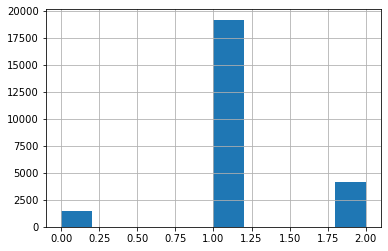

In [10]:
df['class'].hist()

This histogram shows the imbalanced nature of the task - most tweets containing "hate" words as defined by Hatebase were 
only considered to be offensive by the CF coders. More tweets were considered to be neither hate speech nor offensive language than were considered hate speech.

In [11]:
tweets=df.tweet

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/snehal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Feature generation

In [13]:
from nltk.corpus import stopwords
stopwords = (stopwords.words("english"))

other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer()


def preprocess(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    return parsed_text

def tokenize(tweet):
    """Removes punctuation & excess whitespace, sets to lowercase,
    and stems tweets. Returns a list of stemmed tokens."""
    tweet = " ".join(re.split("[^a-zA-Z]*", tweet.lower())).strip()
    tokens = [stemmer.stem(t) for t in tweet.split()]
    return tokens

def basic_tokenize(tweet):
    """Same as tokenize but without the stemming"""
    tweet = " ".join(re.split("[^a-zA-Z.,!?]*", tweet.lower())).strip()
    return tweet.split()


In [14]:

vectorizer = TfidfVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=stopwords,
    use_idf=True,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
#Construct tfidf matrix and get relevant scores
tfidf = vectorizer.fit_transform(tweets).toarray()
vocab = {v:i for i, v in enumerate(vectorizer.get_feature_names_out())}
idf_vals = vectorizer.idf_
idf_dict = {i:idf_vals[i] for i in vocab.values()} #keys are indices; values are IDF scores

In [18]:
tfidf = vectorizer.fit_transform(tweets).toarray()
tfidf.shape

(24783, 3420)

In [19]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/snehal/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [20]:
#Get POS tags for tweets and save as a string
tweet_tags = []
for t in tweets:
    tokens = basic_tokenize(preprocess(t))
    tags = nltk.pos_tag(tokens)
    tag_list = [x[1] for x in tags]
    tag_str = " ".join(tag_list)
    tweet_tags.append(tag_str)

In [21]:
#We can use the TFIDF vectorizer to get a token matrix for the POS tags
pos_vectorizer = TfidfVectorizer(
    tokenizer=None,
    lowercase=False,
    preprocessor=None,
    ngram_range=(1, 3),
    stop_words=None,
    use_idf=False,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=5000,
    min_df=5,
    max_df=0.75,
    )

In [22]:
#Construct POS TF matrix and get vocab dict
pos = pos_vectorizer.fit_transform(pd.Series(tweet_tags)).toarray()

In [24]:
pos_vocab = {v:i for i, v in enumerate(pos_vectorizer.get_feature_names_out())}


In [25]:
#Now get other features
sentiment_analyzer = VS()

def count_twitter_objs(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE
    4) hashtags with HASHTAGHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned.
    
    Returns counts of urls, mentions, and hashtags.
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def other_features(tweet):
    """This function takes a string and returns a list of features.
    These include Sentiment scores, Text and Readability scores,
    as well as Twitter specific features"""
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    
    words = preprocess(tweet) #Get text only
    
    syllables = textstat.syllable_count(words)
    num_chars = sum(len(w) for w in words)
    num_chars_total = len(tweet)
    num_terms = len(tweet.split())
    num_words = len(words.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(words.split()))
    
    ###Modified FK grade, where avg words per sentence is just num words/1
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    ##Modified FRE score, where sentence fixed to 1
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)
    
    twitter_objs = count_twitter_objs(tweet)
    retweet = 0
    if "rt" in words:
        retweet = 1
    features = [FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_terms, num_words,
                num_unique_terms, sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],
                twitter_objs[2], twitter_objs[1],
                twitter_objs[0], retweet]
    #features = pandas.DataFrame(features)
    return features

def get_feature_array(tweets):
    feats=[]
    for t in tweets:
        feats.append(other_features(t))
    return np.array(feats)

In [26]:
other_features_names = ["FKRA", "FRE","num_syllables", "avg_syl_per_word", "num_chars", "num_chars_total", \
                        "num_terms", "num_words", "num_unique_words", "vader neg","vader pos","vader neu", \
                        "vader compound", "num_hashtags", "num_mentions", "num_urls", "is_retweet"]

In [27]:
feats = get_feature_array(tweets)

In [28]:
feats

array([[  7.4 ,  86.71,  28.  , ...,   1.  ,   0.  ,   0.  ],
       [  3.2 , 100.71,  17.  , ...,   1.  ,   0.  ,   0.  ],
       [  4.  , 101.94,  20.  , ...,   2.  ,   0.  ,   1.  ],
       ...,
       [  3.1 ,  96.03,  15.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.6 , 103.05,   8.  , ...,   0.  ,   0.  ,   0.  ],
       [  7.7 ,  70.15,  24.  , ...,   0.  ,   1.  ,   0.  ]])

In [29]:
#Now join them all up
M = np.concatenate([tfidf,pos,feats],axis=1)

In [30]:
M.shape

(24783, 4023)

In [31]:
#Finally get a list of variable names
variables = ['']*len(vocab)
for k,v in vocab.items():
    variables[v] = k

pos_variables = ['']*len(pos_vocab)
for k,v in pos_vocab.items():
    pos_variables[v] = k

feature_names = variables+pos_variables+other_features_names

## Running the model

The best model was selected using a GridSearch with 5-fold CV.

In [32]:
X = pd.DataFrame(M)
y = df['class'].astype(int)

In [33]:
X

,0,1,2,3,4,5,6,7,8,9,...,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022
0,1.291631,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,25.0,23.0,0.000,0.111,0.889,0.4563,0.0,1.0,0.0,0.0
1,2.583261,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,16.0,16.0,0.237,0.000,0.763,-0.6876,0.0,1.0,0.0,0.0
2,2.583261,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,20.0,18.0,0.522,0.000,0.478,-0.9550,0.0,2.0,0.0,1.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,8.0,8.0,0.000,0.314,0.686,0.5673,0.0,2.0,0.0,0.0
4,5.166523,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,26.0,23.0,0.109,0.229,0.662,0.6331,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,2.583261,3.907834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.958858,...,17.0,17.0,0.000,0.000,1.000,0.0000,3.0,3.0,0.0,0.0
24779,3.874892,3.907834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,13.0,12.0,0.386,0.195,0.419,-0.4767,0.0,0.0,0.0,1.0
24780,1.291631,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,13.0,13.0,0.000,0.204,0.796,0.4738,0.0,0.0,0.0,0.0
24781,1.291631,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,7.0,7.0,0.573,0.000,0.427,-0.7717,0.0,0.0,0.0,0.0


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [36]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline

In [37]:
pipe = Pipeline(
        [
          ('select', SelectFromModel(LogisticRegression(class_weight='balanced',penalty="l2", C=0.01))),
          ('model', LogisticRegression(class_weight='balanced',penalty='l2'))
        ]
      )

In [38]:
param_grid = [{}] # Optionally add parameters here

In [39]:
grid_search = GridSearchCV(pipe, 
                           param_grid,
                           cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True).split(X_train, y_train), 
                           verbose=2)

In [40]:
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/snehal/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/snehal/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV] END .................................................... total time=  18.1s


/home/snehal/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/snehal/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV] END .................................................... total time=  19.3s


/home/snehal/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/snehal/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV] END .................................................... total time=  18.3s


/home/snehal/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/snehal/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV] END .................................................... total time=  17.6s


/home/snehal/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/snehal/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV] END .................................................... total time=  18.2s


/home/snehal/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/snehal/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [ ]:
model

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fe2c18744a0>,
             estimator=Pipeline(steps=[('select',
                                        SelectFromModel(estimator=LogisticRegression(C=0.01,
                                                                                     class_weight='balanced'))),
                                       ('model',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid=[{}], verbose=2)

In [41]:
y_preds = model.predict(X_test)

## Evaluating the results

In [42]:
report = classification_report( y_test, y_preds )

***Note: Results in paper are from best model retrained on the entire dataset (see the other notebook). Here the results are reported after using cross-validation and only for the held-out set.***

In [43]:
print(report)

              precision    recall  f1-score   support

           0       0.24      0.54      0.33       164
           1       0.93      0.77      0.84      1905
           2       0.60      0.78      0.68       410

    accuracy                           0.76      2479
   macro avg       0.59      0.70      0.62      2479
weighted avg       0.83      0.76      0.78      2479



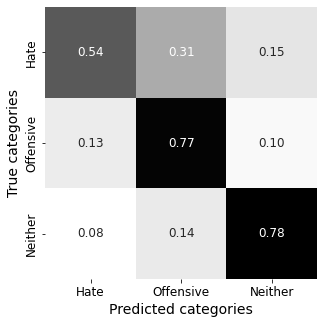

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

#Uncomment line below if you want to save the output
#plt.savefig('confusion.pdf')

<AxesSubplot:>

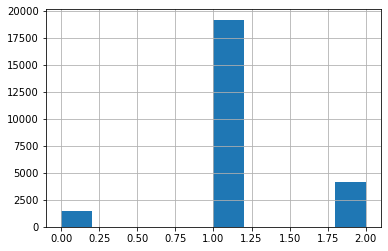

In [45]:
#True distribution
y.hist()

<AxesSubplot:>

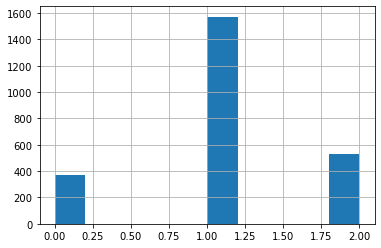

In [46]:
pd.Series(y_preds).hist()

### Custom implementation

In [47]:
from sklearn.ensemble import RandomForestClassifier


In [48]:
# initialize pipeline with feature selection using Logistic Regression
pipe = Pipeline([
    # ('select', SelectFromModel(LogisticRegression(class_weight='balanced', penalty='l2', C=0.01))),
    # ('model', LogisticRegression(class_weight='balanced', penalty='l2'))
])

# add Random Forest classifier to the pipeline
pipe.steps.insert(1, ('select_rf', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))))
pipe.steps.insert(2, ('model_rf', RandomForestClassifier(n_estimators=100, random_state=42)))

# define parameter grid for grid search
param_grid = [{}] # Optionally add parameters here

# initialize grid search object
grid_search = GridSearchCV(pipe, param_grid,
                           cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True).split(X_train, y_train), 
                           verbose=2)

In [49]:
model1 = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=  24.2s
[CV] END .................................................... total time=  23.9s
[CV] END .................................................... total time=  25.2s
[CV] END .................................................... total time=  25.5s
[CV] END .................................................... total time=  24.9s


In [50]:
model1

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f650d1815f0>,
             estimator=Pipeline(steps=[('select_rf',
                                        SelectFromModel(estimator=RandomForestClassifier(random_state=42))),
                                       ('model_rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{}], verbose=2)

In [51]:
y_preds_rf = model1.predict(X_test)

In [52]:
report = classification_report( y_test, y_preds_rf )
print(report)

              precision    recall  f1-score   support

           0       0.42      0.03      0.06       164
           1       0.85      0.98      0.91      1905
           2       0.84      0.53      0.65       410

    accuracy                           0.84      2479
   macro avg       0.70      0.51      0.54      2479
weighted avg       0.82      0.84      0.81      2479



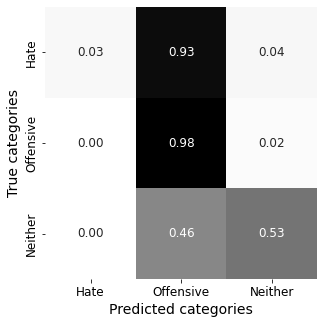

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds_rf)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

#Uncomment line below if you want to save the output
#plt.savefig('confusion.pdf')